# The dataset I'm using for this task contains a list of video games and their sales. Let's start this task by importing the necessary Python libraries  and the dataset:

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
#Load the data from the CSV file using Panda's data frame
data = pd.read_csv("vgsales.csv")

In [121]:
#Print first 5 rows from this dataset
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [122]:
#To she all the columns title of this dataset
data.columns


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [123]:
#To see how many rows and columns are in this dataset
data.shape

(16598, 11)

In [124]:
#To know how many null and nan values are in this dataset
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [125]:
#Drop all null values from this dataset
data.dropna(inplace=True)

In [126]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [127]:
#To check the duplicate values contained in this dataset
data.duplicated().sum()

0

In [128]:
#To get some basic information about this dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


# Before we trai the model, let's take a look at the top 10 best-selling categories:

In [129]:
import matplotlib as mpl


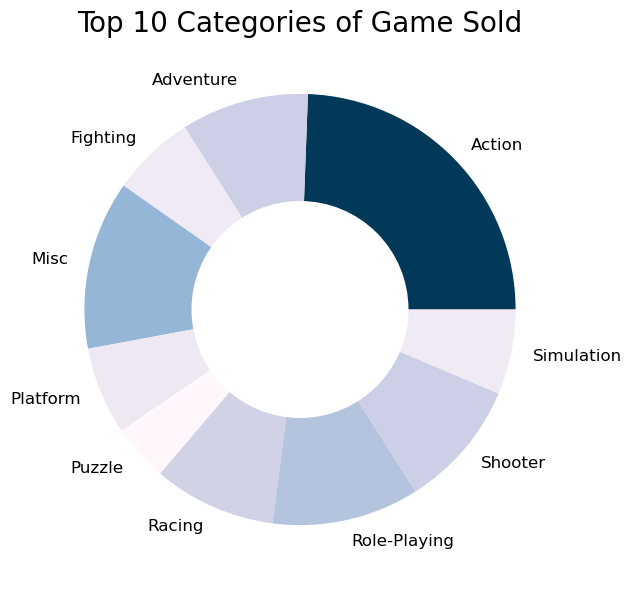

In [130]:
game = data.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax = max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels = game.index, colors = colours)
central_circle = plt.Circle((0,0), 0.5, color = "white")
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc("font", size = 12)
plt.title("Top 10 Categories of Game Sold", fontsize = 20)
plt.show()

# I want to see the correlation between the features of this dataset

In [131]:
print(data.corr(numeric_only=True))

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178027 -0.400315 -0.379137 -0.269323    -0.332735   
Year          0.178027  1.000000 -0.091285  0.006108 -0.169387     0.041128   
NA_Sales     -0.400315 -0.091285  1.000000  0.768923  0.451283     0.634518   
EU_Sales     -0.379137  0.006108  0.768923  1.000000  0.436379     0.726256   
JP_Sales     -0.269323 -0.169387  0.451283  0.436379  1.000000     0.290559   
Other_Sales  -0.332735  0.041128  0.634518  0.726256  0.290559     1.000000   
Global_Sales -0.426975 -0.074647  0.941269  0.903264  0.612774     0.747964   

              Global_Sales  
Rank             -0.426975  
Year             -0.074647  
NA_Sales          0.941269  
EU_Sales          0.903264  
JP_Sales          0.612774  
Other_Sales       0.747964  
Global_Sales      1.000000  


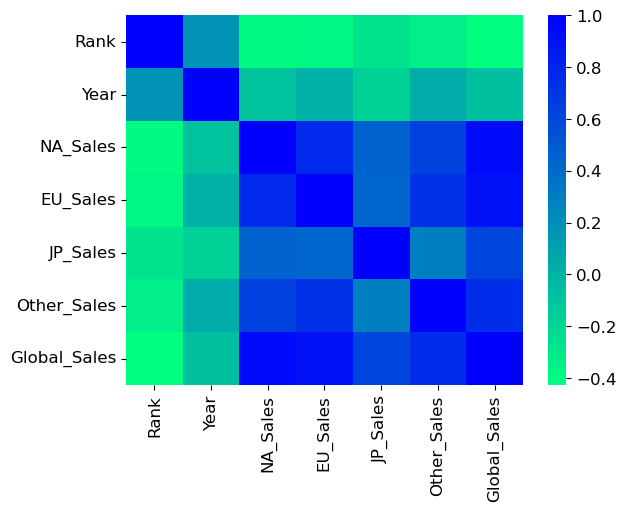

In [132]:
#I am creating a heatmap to see the correlation between the features
sns.heatmap(data.corr(numeric_only=True), cmap = "winter_r")
plt.show()

# Training Video Game Sales Prediction Model


### I am preparing the data by storing the features we need to train this model in the X variable and storing the target columns in the y variable:

In [133]:
data.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [134]:
X = data[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Global_Sales"]

In [135]:
X

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,41.49,29.02,3.77,8.46
1,2,29.08,3.58,6.81,0.77
2,3,15.85,12.88,3.79,3.31
3,4,15.75,11.01,3.28,2.96
4,5,11.27,8.89,10.22,1.00
...,...,...,...,...,...
16593,16596,0.01,0.00,0.00,0.00
16594,16597,0.01,0.00,0.00,0.00
16595,16598,0.00,0.00,0.00,0.00
16596,16599,0.00,0.01,0.00,0.00


In [136]:
y

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16291, dtype: float64

In [137]:
#I want to split the data and use the linear regression algorithm to train this model:
from sklearn.model_selection import train_test_split

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
lr = LinearRegression()

In [141]:
lr.fit(X_train,y_train)

LinearRegression()

In [142]:
y_pred = lr.predict(X_test)

In [143]:
y_pred

array([0.56992573, 0.06056453, 0.19027598, ..., 0.09048589, 0.13035485,
       0.18025191])

In [144]:
from sklearn.metrics import r2_score


In [145]:
r2_score = r2_score(y_test,y_pred)

In [146]:
r2_score

0.9999933287153024

In [147]:
prediction = y_pred.reshape(-1,1)

In [148]:
prediction

array([[0.56992573],
       [0.06056453],
       [0.19027598],
       ...,
       [0.09048589],
       [0.13035485],
       [0.18025191]])

In [149]:
df = pd.DataFrame(prediction, columns=["prediction"])

In [150]:
df

,prediction
0,0.569926
1,0.060565
2,0.190276
3,0.669868
4,0.220192
...,...
3254,0.040685
3255,0.010840
3256,0.090486
3257,0.130355


In [151]:
df1 = pd.DataFrame(data = {"Actal value": y_test})

In [152]:
df1

,Actal value
3527,0.57
12216,0.07
7940,0.19
3030,0.67
7144,0.22
...,...
13781,0.04
15964,0.02
11193,0.09
9400,0.13


In [153]:
Students.set_index("Student_id", inplace=True)

(3259, 1)

In [162]:
df1

""
Actal value
0.57
0.07
0.19
0.67
0.22
...
0.04
0.02
0.09


In [165]:
df1.reset_index(inplace=True)

In [166]:
df1


,Actal value
0,0.57
1,0.07
2,0.19
3,0.67
4,0.22
...,...
3254,0.04
3255,0.02
3256,0.09
3257,0.13


In [167]:
df.head(2)

,prediction
0,0.569926
1,0.060565


In [168]:
df1.head(2)

,Actal value
0,0.57
1,0.07


In [170]:
compare_table = pd.concat([df1,df],axis=1)

In [171]:
compare_table

,Actal value,prediction
0,0.57,0.569926
1,0.07,0.060565
2,0.19,0.190276
3,0.67,0.669868
4,0.22,0.220192
...,...,...
3254,0.04,0.040685
3255,0.02,0.010840
3256,0.09,0.090486
3257,0.13,0.130355


In [172]:
compare_table.head()

,Actal value,prediction
0,0.57,0.569926
1,0.07,0.060565
2,0.19,0.190276
3,0.67,0.669868
4,0.22,0.220192


In [173]:
compare_table["Differance"] = compare_table["Actal value"] - compare_table["prediction"]

In [174]:
compare_table

,Actal value,prediction,Differance
0,0.57,0.569926,0.000074
1,0.07,0.060565,0.009435
2,0.19,0.190276,-0.000276
3,0.67,0.669868,0.000132
4,0.22,0.220192,-0.000192
...,...,...,...
3254,0.04,0.040685,-0.000685
3255,0.02,0.010840,0.009160
3256,0.09,0.090486,-0.000486
3257,0.13,0.130355,-0.000355
